# Loading and viewing your data

In [ ]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset
#print(df_subset.head())
#print(df_subset.tail())


In [ ]:
print(df.info())

In [ ]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))


# Visual exploratory data analysis

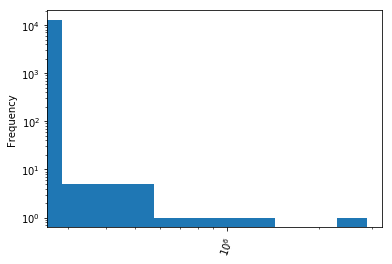

In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

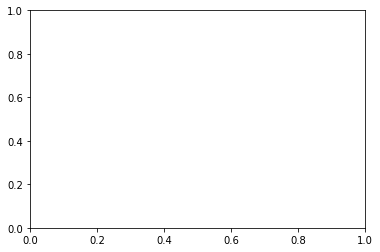

In [12]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()


In [15]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

KeyError: 'initial_cost'

# Tidy Data

In [ ]:
# Print the head of airquality
airquality = pd.read_csv('airquality.csv')
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())



In [ ]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())


# Pivoting data
.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). The melted DataFrame airquality_melt has been pre-loaded for you.



In [ ]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

In [ ]:
# Print the index of airquality_pivot
#print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the new index of airquality_pivot
print(airquality_pivot.index)

# Print the head of airquality_pivot
print(airquality_pivot.head())


### Splitting a column with .str

In [ ]:
tb = pd.read_csv('tb.csv')
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

### Splitting a column with .split() and .get()

In [ ]:
ebola = pd.read_csv('ebola.csv')
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
#print(ebola_melt.info())

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

# Finding files that match a pattern

In [ ]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())


# Iterating and concatenating all matches

In [ ]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames, sort=True)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())


# Converting data type

In [ ]:
import pandas as pd
tips = pd.read_csv('tips.csv')

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())


In [ ]:
import pandas as pd
tips = pd.read_csv('tips.csv')

# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())


# String parsing with regular expressions

In [ ]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result = prog.match('1123-456-7890')
print(bool(result))


In [ ]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


In [ ]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
# Use [A-Z] to match any capital letter followed by \w* to match an arbitrary number of alphanumeric characters.
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)


# Write function to clean the data

In [ ]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)
"""To recode the sex column, use the .apply() method on tips.sex 
with your function as the argument without the parentheses. 
That is, recode_sex and not recode_sex()."""


# Print the first five rows of tips
print(tips.head())


In [ ]:
# check the columns' names
tips.columns
tips.head()

In [14]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())


AttributeError: 'DataFrame' object has no attribute 'total_dollar'

In [ ]:
airquality = pd.read_csv('airquality.csv')
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
print(airquality.info())
airquality.head()

# Testing your data with asserts

In [ ]:
ebola = pd.read_csv('ebola.csv')
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()
"""
chain two .all() methods (that is, .all().all()). 
The first .all() method will return a True or False for each column, 
while the second .all() method will return a single True or False.
"""

# also you can use notnull() as a method
# assert ebola.notnull().all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()


# Thinking about the question at hand

In [ ]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


In [ ]:

# Concatenate the DataFrames row-wise
# Make sure the parameter you insert in "pd.concat()" function is a list.
gapminder = pd.concat([g1800s, g1900s, g2000s])

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


# Principles of tidy data
* Rows form observations
* Columns form variables
* Tidying data will make data cleaning easier
* Melting turns columns into rows
* Pivot will take unique values from a column and form new columns.

In [48]:
gapminder = pd.read_csv('gapminder.csv')

#gapminder.head()

gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life expectancy']
gapminder_melt.head()

country        year  life expectancy
0               Abkhazia  Unnamed: 0              0.0
1            Afghanistan  Unnamed: 0              1.0
2  Akrotiri and Dhekelia  Unnamed: 0              2.0
3                Albania  Unnamed: 0              3.0
4                Algeria  Unnamed: 0              4.0

In [35]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64


ValueError: Unable to parse string "Unnamed: 0" at position 0

In [ ]:
# Create the series of countries: countries
countries = gapminder['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


In [ ]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot(kind='line')

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')


In [40]:
gapminder.head()

Unnamed: 0   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0           0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1           1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13   
2           2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4           4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN            Afghanistan  
2   NaN  Akrotiri and Dhekelia  
3   NaN                Albania  
4   NaN                Algeria  

[5 rows x 219 columns]